<a href="https://colab.research.google.com/github/OsirisEscaL/Machine_learning/blob/main/Customer_Segmentation_Using_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Segmentation Using Scikit-Learn

Customer segmentation is a potent tool enabling businesses to understand their customer base better and tailor their marketing efforts and product offerings to meet specific requirements. Using clustering algorithms from Scikit-Learn, we will examine the process of segmenting consumers based on their purchase behavior. We will use a real-world dataset to make this tutorial practical.

**Dataset**

We'll use the "Online Retail II" dataset on [Kaggle](https://www.kaggle.com/datasets/mashlyn/online-retail-ii-uci) for our customer segmentation assignment. This dataset includes transactional data from an online retailer, including consumer information, product specifications, and purchase history.

**Step 1: Importing Essential Libraries**

Importing the essential Python libraries for the project will be our initial step:

In [1]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning, module="sklearn")

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

**Step 2: Loading and Preprocessing the Dataset**

Once the dataset has been downloaded and extracted, it will be loaded and preprocessed.

In [3]:
# Load the dataset
data = pd.read_csv('online_retail_II.csv')
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


Check the dataset for missing values and determine how to address them. In this case, we removed rows with absent customer IDs:

In [4]:
# Drop the rows with missing customer IDs
data = data.dropna(subset=['Customer ID'])

We will prioritize purchase-related characteristics for customer segmentation, such as each customer's total expenditure. Create a new data frame with the specified attributes:

In [5]:
# Create a DataFrame with customer spending
customer_data = data.groupby('Customer ID')['Price'].sum().reset_index()
customer_data.head()

,Customer ID,Price
0,12346.0,167.55
1,12349.0,24.15
2,12358.0,95.84
3,12359.0,262.34
4,12360.0,14.60


It is best practice to scale our features to have a mean of 0 and a standard deviation of 1:

In [6]:
scaler = StandardScaler()
customer_data['Price'] = scaler.fit_transform(customer_data['Price'].values.reshape(-1, 1))

**Step 3: Choosing the Clustering Algorithm**

We will employ the K-Means clustering algorithm for this customer segmentation project. K-Means is a popular method for clustering comparable data points.

**Model Initialization**

With the desired number of clusters, initialize the K-Means model. You can use techniques like the Elbow Method or Silhouette Score to determine the optimal number of groups. For this illustration, we will use four clusters:

In [7]:
kmeans = KMeans(n_clusters=4, random_state=42)

**Model Training**

Fit the K-Means model to the preprocessed customer data:

In [8]:
kmeans.fit(customer_data[['Price']])

KMeans(n_clusters=4, random_state=42)

**Step 4: Visualization**

Visualizing the results of customer segmentation can produce insightful information about your customer base. Create a scatter plot to illustrate the clusters:

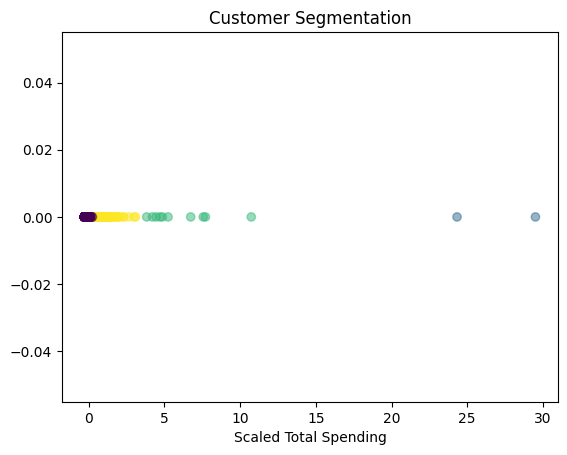

In [9]:
plt.scatter(
    customer_data['Price'],
    [0] * len(customer_data),  # Set Y-coordinate to 0 for all data points
    c=kmeans.labels_,
    cmap='viridis',
    alpha=0.5,
)
plt.title('Customer Segmentation')
plt.xlabel('Scaled Total Spending')
plt.show()

The scatter plot will depict distinct consumer groups based on their scaled total expenditures. Further analysis of these clusters can reveal distinctive customer characteristics and aid in adapting marketing strategies and product offerings.

**Conclusion**

Customer segmentation enables organizations to create personalized experiences for their diverse customer base, fostering growth and customer satisfaction. This initiative demonstrates the practical application of clustering algorithms in real-world situations and lays the groundwork for more advanced customer segmentation strategies. By gaining a more profound comprehension of your customers, you can gain valuable insights and improve your company's performance.